> **<h1>Prediction of football game outcome, given the following csv (comma  seperated) files:**
- Information about home/guest cards, player given a yellow/red card, etc.
- Goals: time of scoring, goals per minute, number of goals per game
- Players: player names & teams, goals scored, etc.
- Football matches: containing information about different stadiums, game time, goals and teams, etc.
- Subs

The research/prediction study is conducted in the following matter:
- Cleaning / researching & reading files
- Counting values / plotting
- Possible learn/award system for ML

># **Data cleaning**

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
%store -r df_cardsRaw
%store -r goals_df
%store -r matchGoals_df
%store -r scoredGoals_df
%store -r matches_df
%store -r goalsScoredByHomeTeam_df
%store -r goalsScoredByGuestTeam_df
%store -r matchSpectators_df
%store -r guestTeams_df
%store -r hostingTeams_df


># **Predictions**

TO DO: Prediction for game Ajax vs PSV
- How many people are going to attend the stadium
- How many cards?
- Are they going to play at home or guesting?
- What are the scores of the teams?
- How does each team perform against other teams?
- ACTUAL PREDICTION: 
Who wins the game? How many goals? Maybe flags?


<h3>PSV vs Ajax. Counting all of the goals<h3>

In [2]:
%store -r goalsOfBothTeamsAgainstEachother
%store -r goalsOfPsvVsAjax
%store -r goalsOfAjaxVsPsv
%store -r df_HostAjaxScoredGoalsPerSeason
%store -r df_GuestAjaxScoredGoalsPerSeason
%store -r df_HostPSVScoredGoalsPerSeason
%store -r df_GuestPSVScoredGoalsPerSeason
%store -r yellowRedCardsAjax
%store -r yellowRedCardsPsv
%store -r yellowRedCardsBothTeams
%store -r df_HostAjaxYRCardsPerSeason
%store -r df_GuestAjaxYRCardsPerSeason
%store -r df_HostPsvYRCardsPerSeason
%store -r df_GuestPsvYRCardsPerSeason
%store -r df_HostAjaxScoredGoalsPerMatch
%store -r df_GuestAjaxScoredGoalsPerMatch
%store -r df_HostPSVScoredGoalsPerMatch
%store -r df_GuestPSVScoredGoalsPerMatch

>**<h3>Probability of PSV Eindhoven getting a yellow card as a hosting team<h3>**

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
psv_host_inputs = df_HostPsvYRCardsPerSeason.drop(['Team_with_card', 'Season'], axis = 'columns')
psv_host_target = df_HostPsvYRCardsPerSeason['Team_with_card']
psv_host_lab_target_team = LabelEncoder()
psv_host_lab_enemy_team = LabelEncoder()
psv_host_lab_type_of_card = LabelEncoder()
psv_host_inputs['target_team_n'] = psv_host_lab_target_team.fit_transform(psv_host_inputs['Target_team'])
psv_host_inputs['enemy_team_n'] = psv_host_lab_target_team.fit_transform(psv_host_inputs['Enemy_team'])
psv_host_inputs['type_of_card_n'] = psv_host_lab_target_team.fit_transform(psv_host_inputs['Type_of_card'])
psv_host_inputs_n = psv_host_inputs.drop(['Target_team','Enemy_team','Type_of_card'],axis = 'columns')
psv_host_model = tree.DecisionTreeClassifier()
psv_host_model.fit(psv_host_inputs_n,psv_host_target)
psv_host_model.score(psv_host_inputs_n,psv_host_target)


0.6805797101449276

**#1 == target team <br> #2 == enemy team <br> #3 == type of card**<br> Which team is more likely to get the card during the game<br>In this case SC Cambuur is more likely to receive a yellow card that PSV (with an accuracy of 68%)

In [4]:
#0, 28, 1 - psv-eindhoven, playing against sc-cambuur, yellow-card, who is most likely to get yellow
psv_host_model.predict([[0,28,1]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['sc-cambuur'], dtype=object)

>**<h3>Probability of Ajax getting a yellow card as a hosting team<h3>**

In [5]:
ajax_host_inputs = df_HostAjaxYRCardsPerSeason.drop(['Team_with_card', 'Season'], axis = 'columns')
ajax_host_target = df_HostAjaxYRCardsPerSeason['Team_with_card']
ajax_host_lab_target_team = LabelEncoder()
ajax_host_lab_enemy_team = LabelEncoder()
ajax_host_lab_type_of_card = LabelEncoder()
ajax_host_inputs['target_team_n'] = ajax_host_lab_target_team.fit_transform(ajax_host_inputs['Target_team'])
ajax_host_inputs['enemy_team_n'] = ajax_host_lab_target_team.fit_transform(ajax_host_inputs['Enemy_team'])
ajax_host_inputs['type_of_card_n'] = ajax_host_lab_target_team.fit_transform(ajax_host_inputs['Type_of_card'])
ajax_host_inputs.head()
ajax_host_inputs_n = ajax_host_inputs.drop(['Target_team','Enemy_team','Type_of_card'],axis = 'columns')
ajax_host_model = tree.DecisionTreeClassifier()
ajax_host_model.fit(ajax_host_inputs_n,ajax_host_target)
ajax_host_model.score(ajax_host_inputs_n, ajax_host_target)

0.7095170454545454

**#1 == target team <br> #2 == enemy team <br> #3 == type of card**<br> Which team is more likely to get the card during the game<br>In this case FC Dordrecht is more likely to receive a yellow card that Ajax (with an accuracy of 71%)

In [6]:
ajax_host_model.predict([[0,7,0]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['fc-dordrecht'], dtype=object)

>**<h3>Probability of PSV Eindhoven getting a yellow card as a guest team<h3>**

In [7]:
psv_guest_inputs = df_GuestPsvYRCardsPerSeason.drop(['Team_with_card', 'Season'], axis = 'columns')
psv_guest_target = df_GuestPsvYRCardsPerSeason['Team_with_card']
psv_guest_lab_target_team = LabelEncoder()
psv_guest_lab_enemy_team = LabelEncoder()
psv_guest_lab_type_of_card = LabelEncoder()
psv_guest_inputs['target_team_n'] = psv_guest_lab_target_team.fit_transform(psv_guest_inputs['Target_team'])
psv_guest_inputs['enemy_team_n'] = psv_guest_lab_target_team.fit_transform(psv_guest_inputs['Enemy_team'])
psv_guest_inputs['type_of_card_n'] = psv_guest_lab_target_team.fit_transform(psv_guest_inputs['Type_of_card'])
psv_guest_inputs.head()
psv_guest_inputs_n = psv_guest_inputs.drop(['Target_team','Enemy_team','Type_of_card'],axis = 'columns')
psv_guest_model = tree.DecisionTreeClassifier()
psv_guest_model.fit(psv_guest_inputs_n, psv_guest_target)
psv_guest_model.score(psv_guest_inputs_n, psv_guest_target)

0.582903040734366

**#1 == target team <br> #2 == enemy team <br> #3 == type of card**<br> Which team is more likely to get the card during the game<br>In this case De Graafschap is more likely to receive a yellow card that PSV (with an accuracy of 58%)

In [8]:
psv_guest_model.predict([[0, 5, 0]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['de-graafschap'], dtype=object)

>**<h3>Probability of Ajax getting a yellow card as a guest team<h3>**

In [9]:
ajax_guest_inputs = df_GuestAjaxYRCardsPerSeason.drop(['Team_with_card', 'Season'], axis = 'columns')
ajax_guest_target = df_GuestAjaxYRCardsPerSeason['Team_with_card']
ajax_guest_lab_target_team = LabelEncoder()
ajax_guest_lab_enemy_team = LabelEncoder()
ajax_guest_lab_type_of_card = LabelEncoder()
ajax_guest_inputs['target_team_n'] = ajax_guest_lab_target_team.fit_transform(ajax_guest_inputs['Target_team'])
ajax_guest_inputs['enemy_team_n'] = ajax_guest_lab_target_team.fit_transform(ajax_guest_inputs['Enemy_team'])
ajax_guest_inputs['type_of_card_n'] = ajax_guest_lab_target_team.fit_transform(ajax_guest_inputs['Type_of_card'])
ajax_guest_inputs.head()
ajax_guest_inputs_n = ajax_guest_inputs.drop(['Target_team','Enemy_team','Type_of_card'],axis = 'columns')
ajax_guest_model = tree.DecisionTreeClassifier()
ajax_guest_model.fit(ajax_guest_inputs_n,ajax_guest_target)
ajax_guest_model.score(ajax_guest_inputs_n, ajax_guest_target)

0.568569746909947

**#1 == target team <br> #2 == enemy team <br> #3 == type of card**<br> Which team is more likely to get the card during the game<br>In this case FC Den Bosch is more likely to receive a yellow card that ajax (with an accuracy of 57%)

In [10]:
ajax_guest_model.predict([[0, 5, 0]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['fc-den-bosch'], dtype=object)

>**<h3>Probability of Ajax scoring a goal as a host team in a given minute<h3>**

In [11]:
ajax_host_goals_inputs = df_HostAjaxScoredGoalsPerSeason.drop(['Team scored a goal', 'Player scored the goal', 'Season'], axis = 'columns')
ajax_host_goals_target = df_HostAjaxScoredGoalsPerSeason['Team scored a goal']
ajax_host_goals_lab_target_team = LabelEncoder()
ajax_host_goals_lab_enemy_team = LabelEncoder()
ajax_host_goals_lab_minute_of_goal = LabelEncoder()
ajax_host_goals_inputs['target_team_n'] = ajax_host_goals_lab_target_team.fit_transform(ajax_host_goals_inputs['Hosts'])
ajax_host_goals_inputs['enemy_team_n'] = ajax_host_goals_lab_target_team.fit_transform(ajax_host_goals_inputs['Guests'])
ajax_host_goals_inputs['minute_of_goal'] = ajax_host_goals_lab_minute_of_goal.fit_transform(ajax_host_goals_inputs['Minute of scored goal'])
ajax_host_goals_inputs.head()
ajax_host_goals_inputs_n = ajax_host_goals_inputs.drop(['Hosts','Guests', 'Minute of scored goal'],axis = 'columns')
ajax_host_goals_model = tree.DecisionTreeClassifier()
ajax_host_goals_model.fit(ajax_host_goals_inputs_n,ajax_host_goals_target)
ajax_host_goals_model.score(ajax_host_goals_inputs_n, ajax_host_goals_target)

0.8688066992323796

**Ajax vs. PSV Eindhoven** <br>Ajax - host, PSV - guest<br> Prediction says Ajax is more likely to score a goal the 90th minute of the match (with an accuracy of 87%)

In [12]:
ajax_host_goals_model.predict([[0, 1, 89]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['afc-ajax'], dtype=object)

>**<h3>Probability of Ajax scoring a goal as a guest team in a given minute<h3>**

In [13]:
ajax_guest_goals_inputs = df_GuestAjaxScoredGoalsPerSeason.drop(['Team scored a goal', 'Player scored the goal', 'Season', ], axis = 'columns')
ajax_guest_goals_target = df_GuestAjaxScoredGoalsPerSeason['Team scored a goal']
ajax_guest_goals_lab_target_team = LabelEncoder()
ajax_guest_goals_lab_enemy_team = LabelEncoder()
ajax_guest_goals_lab_minute_of_goal = LabelEncoder()
ajax_guest_goals_inputs['target_team_n'] = ajax_guest_goals_lab_target_team.fit_transform(ajax_guest_goals_inputs['Guests'])
ajax_guest_goals_inputs['enemy_team_n'] = ajax_guest_goals_lab_target_team.fit_transform(ajax_guest_goals_inputs['Hosts'])
ajax_guest_goals_inputs['minute_of_goal'] = ajax_guest_goals_lab_minute_of_goal.fit_transform(ajax_guest_goals_inputs['Minute of scored goal'])
ajax_guest_goals_inputs.head()
ajax_guest_goals_inputs_n = ajax_guest_goals_inputs.drop(['Hosts','Guests', 'Minute of scored goal'],axis = 'columns')
ajax_guest_goals_model = tree.DecisionTreeClassifier()
ajax_guest_goals_model.fit(ajax_guest_goals_inputs_n, ajax_guest_goals_target)
ajax_guest_goals_model.score(ajax_guest_goals_inputs_n, ajax_guest_goals_target)

0.8242748521543227

**Ajax vs. PSV Eindhoven** <br>PSV - host, Ajax - guest<br> Prediction says Ajax is more likely to score a goal the 45th minute of the match (with an accuracy of 82%)

In [14]:
ajax_guest_goals_model.predict([[0, 1, 44]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['afc-ajax'], dtype=object)

>**<h3>Probability of PSV Eindhoven scoring a goal as a host team in a given minute<h3>**

In [15]:
psv_host_goals_inputs = df_HostPSVScoredGoalsPerSeason.drop(['Team scored a goal', 'Player scored the goal', 'Season'], axis = 'columns')
psv_host_goals_target = df_HostPSVScoredGoalsPerSeason['Team scored a goal']
psv_host_goals_lab_target_team = LabelEncoder()
psv_host_goals_lab_enemy_team = LabelEncoder()
psv_host_goals_lab_minute_of_goal = LabelEncoder()
psv_host_goals_inputs['target_team_n'] = psv_host_goals_lab_target_team.fit_transform(psv_host_goals_inputs['Hosts'])
psv_host_goals_inputs['enemy_team_n'] = psv_host_goals_lab_target_team.fit_transform(psv_host_goals_inputs['Guests'])
psv_host_goals_inputs['minute_of_goal'] = psv_host_goals_lab_minute_of_goal.fit_transform(psv_host_goals_inputs['Minute of scored goal'])
psv_host_goals_inputs.head()
psv_host_goals_inputs_n = psv_host_goals_inputs.drop(['Hosts','Guests', 'Minute of scored goal'],axis = 'columns')
psv_host_goals_model = tree.DecisionTreeClassifier()
psv_host_goals_model.fit(psv_host_goals_inputs_n, psv_host_goals_target)
psv_host_goals_model.score(psv_host_goals_inputs_n, psv_host_goals_target)

0.8547854785478548

**PSV Eindhoven vs. Ajax** <br>PSV - host, Ajax - guest<br> Prediction says PSV Eindhoven is more likely to score a goal the fifth minute of the match (with an accuracy of 85%)

In [16]:
psv_host_goals_model.predict([[0, 1, 4]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['psv-eindhoven'], dtype=object)

>**<h3>Probability of PSV Eindhoven scoring a goal as a guest team in a given minute<h3>**

In [17]:
psv_guest_goals_inputs = df_GuestPSVScoredGoalsPerSeason.drop(['Team scored a goal', 'Player scored the goal', 'Season'], axis = 'columns')
psv_guest_goals_target = df_GuestPSVScoredGoalsPerSeason['Team scored a goal']
psv_guest_goals_lab_target_team = LabelEncoder()
psv_guest_goals_lab_enemy_team = LabelEncoder()
psv_guest_goals_lab_minute_of_goal = LabelEncoder()
psv_guest_goals_inputs['target_team_n'] = psv_guest_goals_lab_target_team.fit_transform(psv_guest_goals_inputs['Guests'])
psv_guest_goals_inputs['enemy_team_n'] = psv_guest_goals_lab_target_team.fit_transform(psv_guest_goals_inputs['Hosts'])
psv_guest_goals_inputs['minute_of_goal'] = psv_guest_goals_lab_minute_of_goal.fit_transform(psv_guest_goals_inputs['Minute of scored goal'])
psv_guest_goals_inputs.head()
psv_guest_goals_inputs_n = psv_guest_goals_inputs.drop(['Hosts','Guests', 'Minute of scored goal'],axis = 'columns')
psv_guest_goals_model = tree.DecisionTreeClassifier()
psv_guest_goals_model.fit(psv_guest_goals_inputs_n, psv_guest_goals_target)
psv_guest_goals_model.score(psv_guest_goals_inputs_n, psv_guest_goals_target)

0.8190421565815887

**Ajax vs PSV Eindhoven** <br> Ajax - host, PSV - guest <br> Prediction says Ajax is more likely to score a goal the second minute of the match (with an accuracy of 82%)

In [18]:
psv_guest_goals_model.predict([[0, 1, 1]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['afc-ajax'], dtype=object)

>**<h3>Probability of PSV Eindhoven winnig a match as hosts against Ajax, <br>given the number of red flags.<h3>**

In [19]:
%store -r numberOfYellowRedCardsPSV
%store -r df_PSVCardsOverall
%store -r numberOfRedCardsPSV
%store -r numberOfYellowRedCardsAjax
%store -r numberOfRedCardsAjax
%store -r df_ScoresForPSVHost


>**<h4>PSV Eindhoven hosing. Chance of winnig against Ajax given having received a red flag<h4>**

In [20]:
df_PSVHostPSVWinPSVRedCard = df_ScoresForPSVHost.loc[df_ScoresForPSVHost['Red_cards_Host'] == '1']

In [21]:
psv_redf_goals_inputs = df_PSVHostPSVWinPSVRedCard.drop(['Team scored a goal', 'Season', 'Red_cards_Host'], axis = 'columns')
psv_redf_goals_target = df_PSVHostPSVWinPSVRedCard['Team scored a goal']
psv_redf_goals_lab_target_team = LabelEncoder()
psv_redf_goals_lab_enemy_team = LabelEncoder()
psv_redf_goals_inputs['target_team_n'] = psv_redf_goals_lab_target_team.fit_transform(psv_redf_goals_inputs['Hosts'])
psv_redf_goals_inputs['enemy_team_n'] = psv_redf_goals_lab_enemy_team.fit_transform(psv_redf_goals_inputs['Guests'])
psv_redf_goals_inputs.head()
psv_redf_goals_inputs_n = psv_redf_goals_inputs.drop(['Hosts','Guests'],axis = 'columns')
psv_redf_goals_model = tree.DecisionTreeClassifier()
psv_redf_goals_model.fit(psv_redf_goals_inputs_n, psv_redf_goals_target)
psv_redf_goals_model.score(psv_redf_goals_inputs_n, psv_redf_goals_target)

0.8075601374570447

**PSC Eindhoven vs. Ajax** <br> PSV - host, Ajax - guest <br> Given: PSV reveives at least one red flag. <br> Prediction says PSV Eindhoven will win the match (with an accuracy of 81%)

In [22]:
psv_redf_goals_model.predict([[0,1]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['psv-eindhoven'], dtype=object)

>**<h4>PSV Eindhoven hosing. Chance of winnig agains Ajax given having NOT received a red flag<h4>**

In [23]:
df_PSVHostPSVWinPSVNoCards = df_ScoresForPSVHost.loc[df_ScoresForPSVHost['Red_cards_Host'] == 0]

In [24]:
psv_no_redf_goals_inputs = df_PSVHostPSVWinPSVNoCards.drop(['Team scored a goal', 'Season', 'Red_cards_Host'], axis = 'columns')
psv_no_redf_goals_target = df_PSVHostPSVWinPSVNoCards['Team scored a goal']
psv_no_redf_goals_lab_target_team = LabelEncoder()
psv_no_redf_goals_lab_enemy_team = LabelEncoder()
psv_no_redf_goals_lab_type_of_card = LabelEncoder()
psv_no_redf_goals_inputs['target_team_n'] = psv_no_redf_goals_lab_target_team.fit_transform(psv_no_redf_goals_inputs['Hosts'])
psv_no_redf_goals_inputs['enemy_team_n'] = psv_no_redf_goals_lab_target_team.fit_transform(psv_no_redf_goals_inputs['Guests'])
psv_no_redf_goals_inputs.head()
psv_no_redf_goals_inputs_n = psv_no_redf_goals_inputs.drop(['Hosts','Guests'],axis = 'columns')
psv_no_redf_goals_model = tree.DecisionTreeClassifier()
psv_no_redf_goals_model.fit(psv_no_redf_goals_inputs_n, psv_no_redf_goals_target)
psv_no_redf_goals_model.score(psv_no_redf_goals_inputs_n, psv_no_redf_goals_target)

0.7480547357123692

**PSC Eindhoven vs. Ajax** <br> PSV - host, Ajax - guest <br> Given: PSV does **NOT** receive a red flag during the game. <br> Prediction says PSV Eindhoven will win the match (with an accuracy of 75%)

In [25]:
psv_no_redf_goals_model.predict([[0,1]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['psv-eindhoven'], dtype=object)

>**<h4>PSV vs. Ajax. Winning predictions<h4>**

In [26]:
%store -r df_ScoresForAjaxHost
%store -r df_goalsPredictionCambuurHost

In [27]:
ajax_host_lab_target = LabelEncoder()
ajax_host_lab_enemy_team = LabelEncoder()
ajax_host_lab_stadium = LabelEncoder()
from sklearn.model_selection import train_test_split
X = df_ScoresForAjaxHost[["Target_team_host","Enemy_team_guest","Target_team_scores_host", "Stadium"]]
y = df_ScoresForAjaxHost["Winning_team"]

X["Target_team_host"] = ajax_host_lab_target.fit_transform(X['Target_team_host'])
X["Enemy_team_guest"] = ajax_host_lab_enemy_team.fit_transform(X['Enemy_team_guest'])
X["Stadium"] = ajax_host_lab_stadium.fit_transform(X['Stadium'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
winning_team_ajax_host = tree.DecisionTreeClassifier()
winning_team_ajax_host.fit(X_train,y_train)
winning_team_ajax_host.score(X_train,y_train)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8768\1837032764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Target_team_host"] = ajax_host_lab_target.fit_transform(X['Target_team_host'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8768\1837032764.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Enemy_team_guest"] = ajax_host_lab_enemy_team.fit_transform(X['Enemy_team_guest'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8768\1837032764.py:10: SettingWithCopyWarning: 
A value is trying to be s

0.898428053204353

In [28]:
winning_team_ajax_host.predict([[0,1,4,2]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [29]:
sc_cambuur_host_lbl = LabelEncoder()
enemy_team_sc_cambuur_host_lbl = LabelEncoder()
stadium_sc_cambuur_host_lbl = LabelEncoder()
from sklearn.model_selection import train_test_split
#Win prediction
Input_win_prediction = df_goalsPredictionCambuurHost[["Target_team_host","Enemy_team_guest", "Stadium"]]
Prediction_of_win = df_goalsPredictionCambuurHost["Winning_team"]

#Goals prediction
Input_goals_prediction = df_goalsPredictionCambuurHost[["Target_team_host","Enemy_team_guest", "Enemy_team_scores_guest", "Stadium"]]
Prediction_of_goals = df_goalsPredictionCambuurHost["Target_team_scores_host"]

#Win prediction
Input_win_prediction["Target_team_host"] = sc_cambuur_host_lbl.fit_transform(Input_win_prediction['Target_team_host'])
Input_win_prediction["Enemy_team_guest"] = enemy_team_sc_cambuur_host_lbl.fit_transform(Input_win_prediction['Enemy_team_guest'])
Input_win_prediction["Stadium"] = stadium_sc_cambuur_host_lbl.fit_transform(Input_win_prediction['Stadium'])

#Goals prediction
Input_goals_prediction["Target_team_host"] = sc_cambuur_host_lbl.fit_transform(Input_win_prediction['Target_team_host'])
Input_goals_prediction["Enemy_team_guest"] = enemy_team_sc_cambuur_host_lbl.fit_transform(Input_win_prediction['Enemy_team_guest'])
Input_goals_prediction["Stadium"] = stadium_sc_cambuur_host_lbl.fit_transform(Input_win_prediction['Stadium'])

Input_win_train, Input_win_test, prediction_win_train, prediction_win_test = train_test_split(Input_win_prediction, Prediction_of_win, test_size=0.20, random_state=1)
Input_goals_train, Input_goals_test, prediction_goals_train, prediction_goals_test = train_test_split(Input_goals_prediction, Prediction_of_goals, test_size=0.20, random_state=1)
winning_team_sc_cambuur_host = tree.DecisionTreeClassifier()
winning_team_sc_cambuur_host.fit(Input_win_train,prediction_win_train)
winning_team_sc_cambuur_host.score(Input_win_train,prediction_win_train)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8768\3179811627.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Input_win_prediction["Target_team_host"] = sc_cambuur_host_lbl.fit_transform(Input_win_prediction['Target_team_host'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8768\3179811627.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Input_win_prediction["Enemy_team_guest"] = enemy_team_sc_cambuur_host_lbl.fit_transform(Input_win_prediction['Enemy_team_guest'])
C:\Users\Lenovo\AppData\Local\Temp\

0.6984126984126984

- **SC-CAMBUUR label = 0**
- **rkc-waalwijk = 19**
- **cambuur-stadium-leuwarden = 0**	

In [30]:
#If sc_cambuur is playing on their own stadium, prediction says they will lose (with an accuracy of 69%)
winning_team_sc_cambuur_host.predict([[0,19,0]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([-1], dtype=int64)

In [31]:
goals_of_sc_cambuur_host = tree.DecisionTreeClassifier()
goals_of_sc_cambuur_host.fit(Input_goals_train,prediction_goals_train)
goals_of_sc_cambuur_host.score(Input_goals_train,prediction_goals_train)

0.8571428571428571

In [32]:
#Different outcomes for possible goals that sc_cambuur could have against rkc-waalwijk
goals_prediction_sc_cambuur = pd.DataFrame()

goals_prediction_sc_cambuur['Rkc-scores-0'] = goals_of_sc_cambuur_host.predict([[0,19,0,0]])
goals_prediction_sc_cambuur['Rkc-scores-1'] = goals_of_sc_cambuur_host.predict([[0,19,1,0]])
goals_prediction_sc_cambuur['Rkc-scores-2'] = goals_of_sc_cambuur_host.predict([[0,19,2,0]])
goals_prediction_sc_cambuur['Rkc-scores-3'] = goals_of_sc_cambuur_host.predict([[0,19,3,0]])
goals_prediction_sc_cambuur['Rkc-scores-4'] = goals_of_sc_cambuur_host.predict([[0,19,4,0]])
goals_prediction_sc_cambuur

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have 

,Rkc-scores-0,Rkc-scores-1,Rkc-scores-2,Rkc-scores-3,Rkc-scores-4
0,1,1,0,1,1


>**<h4>All *teams* that gets a card, sorted by seasons and type of cards**

In [33]:
%store -r df_CardsPrediction
target_team_label = LabelEncoder()
enemy_team_label = LabelEncoder()
team_with_card_label = LabelEncoder()
type_of_card_label = LabelEncoder()
from sklearn.model_selection import train_test_split
#Cards prediction
Input_Card_Prediction = df_CardsPrediction[["Target_team_host","Enemy_team_guest"]]
Prediction_of_cards = df_CardsPrediction["Team_with_card"]

#Cards prediction
Input_Card_Prediction["Target_team_host"] = target_team_label.fit_transform(Input_Card_Prediction['Target_team_host'])
Input_Card_Prediction["Enemy_team_guest"] = enemy_team_label.fit_transform(Input_Card_Prediction['Enemy_team_guest'])

Input_card_train, Input_card_test, prediction_card_train, prediction_card_test = train_test_split(Input_Card_Prediction, Prediction_of_cards, test_size=0.20, random_state=1)
model_prediction_of_cards = tree.DecisionTreeClassifier()
model_prediction_of_cards.fit(Input_card_train,prediction_card_train)
model_prediction_of_cards.score(Input_card_train,prediction_card_train)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8768\3986954391.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Input_Card_Prediction["Target_team_host"] = target_team_label.fit_transform(Input_Card_Prediction['Target_team_host'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8768\3986954391.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Input_Card_Prediction["Enemy_team_guest"] = enemy_team_label.fit_transform(Input_Card_Prediction['Enemy_team_guest'])


0.6122788681144273

In [34]:
model_prediction_of_cards.predict([[38,14]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['feyenoord'], dtype=object)

>**<h4>If Ajax is host, *teams* that gets a card, sorted by seasons and type of cards**

In [35]:
%store -r df_goals_prediction_all_teams
target_team_goals_label = LabelEncoder()
enemy_team_goals_label = LabelEncoder()
scores_target_team_label = LabelEncoder()
enemy_scores_label = LabelEncoder()
hosting_stadium_label = LabelEncoder()
from sklearn.model_selection import train_test_split
#Goals prediction
Input_All_Teams_Goals_Prediction = df_goals_prediction_all_teams[["Target_team_host","Enemy_team_guest"]]
Prediction_Of_All_Teams_Goals= df_goals_prediction_all_teams["Winning_team"]

#Goals prediction
Input_All_Teams_Goals_Prediction["Target_team_host"] = target_team_goals_label.fit_transform(Input_All_Teams_Goals_Prediction['Target_team_host'])
Input_All_Teams_Goals_Prediction["Enemy_team_guest"] = enemy_team_goals_label.fit_transform(Input_All_Teams_Goals_Prediction['Enemy_team_guest'])

mappingHost = dict(zip(target_team_goals_label.classes_, range(len(target_team_goals_label.classes_))))
mappingGuest = dict(zip(enemy_team_goals_label.classes_, range(len(enemy_team_goals_label.classes_))))

Input_All_Teams_Goals_train, Input_All_Teams_Goals_test, prediction_All_Teams_Goals_train, prediction_All_Teams_Goals_test = train_test_split(Input_All_Teams_Goals_Prediction, Prediction_Of_All_Teams_Goals, test_size=0.20, random_state=1)
def searchTeam(teams, teamName):
    for (k,i) in teams.items():
        if k == teamName:
            return (k, i)

searchResults = pd.DataFrame()
hostTeam = "psv-eindhoven"
enemyTeam ="afc-ajax"
searchResults['Hosting_team'] = searchTeam(mappingHost,hostTeam) 
searchResults['Enemy_team'] = searchTeam(mappingGuest,enemyTeam)
winpredict_all_teams_model = tree.DecisionTreeClassifier()
winpredict_all_teams_model.fit(Input_All_Teams_Goals_train,prediction_All_Teams_Goals_train)
winpredict_all_teams_model.score(Input_All_Teams_Goals_train,prediction_All_Teams_Goals_train)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8768\769672210.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Input_All_Teams_Goals_Prediction["Target_team_host"] = target_team_goals_label.fit_transform(Input_All_Teams_Goals_Prediction['Target_team_host'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8768\769672210.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Input_All_Teams_Goals_Prediction["Enemy_team_guest"] = enemy_team_goals_label.fit_transform(Input_All_Teams_Goals_Prediction['Enemy_team_gu

0.5911168329578371

In [36]:
winning_teams_psv_vis = pd.DataFrame()

psvVSajax = winpredict_all_teams_model.predict([[35,1]])
psvVSwillem = winpredict_all_teams_model.predict([[35,54]])
psvVSFCGroningen = winpredict_all_teams_model.predict([[35,16]])
psvVSFCFeyenoord= winpredict_all_teams_model.predict([[35,21]])
psvVSFCFCTwente = winpredict_all_teams_model.predict([[35,17]])

winning_teams_psv_vis =  pd.DataFrame({'Games':['PSV_vs_AJAX', 'PSV_vs_WILLEM','PSV_vs_FCGroningen','PSV_vs_feyenoord','PSV_vs_FCtwente'], 
'result':[psvVSajax[0],psvVSwillem[0],psvVSFCGroningen[0],psvVSFCFeyenoord[0], psvVSFCFCTwente[0]]})

winning_teams_psv_vis

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have 

,Games,result
0,PSV_vs_AJAX,1
1,PSV_vs_WILLEM,1
2,PSV_vs_FCGroningen,1
3,PSV_vs_feyenoord,1
4,PSV_vs_FCtwente,1


<AxesSubplot:title={'center':'Goals of PSV as hosts vs different teams'}, xlabel='Games'>

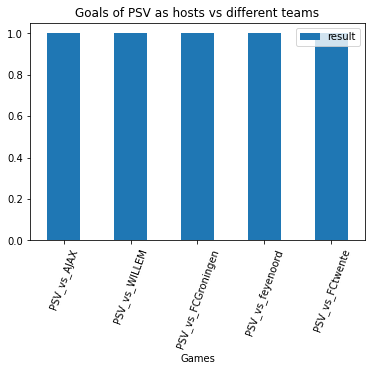

In [37]:
winning_teams_psv_vis.plot.bar(x="Games", y="result", rot=70, title="Goals of PSV as hosts vs different teams")

In [38]:
winning_teams_ajax_vis = pd.DataFrame()

ajaxVSpsv = winpredict_all_teams_model.predict([[1,36]])
ajaxVSWillem = winpredict_all_teams_model.predict([[1,54]])
ajaxVSFCGroningen = winpredict_all_teams_model.predict([[1,16]])
ajaxVSFCFeyenoord= winpredict_all_teams_model.predict([[1,21]])
ajaxVSFCFCTwente = winpredict_all_teams_model.predict([[1,17]])

winning_teams_ajax_vis =  pd.DataFrame({'Games':['Ajax_vs_PSV', 'Ajax_vs_WILLEM','Ajax_vs_FCGroningen','Ajax_vs_feyenoord','Ajax_vs_FCtwente'], 
'result':[ajaxVSpsv[0],ajaxVSWillem[0],ajaxVSFCGroningen[0],ajaxVSFCFeyenoord[0], ajaxVSFCFCTwente[0]]})

winning_teams_ajax_vis

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have 

,Games,result
0,Ajax_vs_PSV,1
1,Ajax_vs_WILLEM,1
2,Ajax_vs_FCGroningen,1
3,Ajax_vs_feyenoord,1
4,Ajax_vs_FCtwente,1


<AxesSubplot:title={'center':'Goals of Ajax as hosts vs different teams'}, xlabel='Games'>

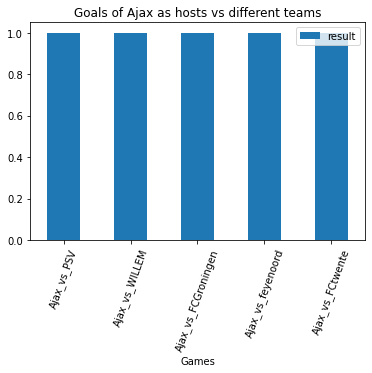

In [39]:
winning_teams_ajax_vis.plot.bar(x="Games", y="result", rot=70, title="Goals of Ajax as hosts vs different teams")